<a href="https://colab.research.google.com/github/kustovass/detection-of-key-points-of-the-human-skeleton/blob/main/Graphs_yolov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построение графиков

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive

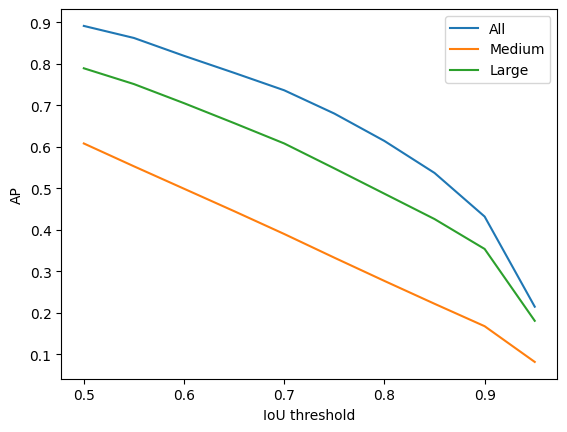

In [3]:
import matplotlib.pyplot as plt

iou_thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

AP_all = [0.891, 0.862, 0.819, 0.778, 0.736, 0.680, 0.614, 0.537, 0.432, 0.215]
AP_medium = [0.608, 0.553, 0.499, 0.445, 0.390, 0.333, 0.277, 0.222, 0.168, 0.082]
AP_large = [0.789, 0.751, 0.705, 0.657, 0.608, 0.548, 0.487, 0.426, 0.354, 0.181]

plt.plot(iou_thresholds, AP_all, label='All')
plt.plot(iou_thresholds, AP_medium, label='Medium')
plt.plot(iou_thresholds, AP_large, label='Large')
plt.xlabel('IoU threshold')
plt.ylabel('AP')
plt.legend()
plt.show()

# Кривая Precision-Recall

In [4]:
import numpy as np
import json
import os

CONF = 0.001

def find_annotation(annotations, image_id):
  res = []
  for a in annotations:
    if a['image_id'] == image_id:
      res.append(a)
  return res

def is_right_keypoint(x_item, y_item, x_ann, y_ann):
  if ((x_item - x_ann)**2 + (y_item - y_ann)**2) ** 0.5 > CONF:
    return False
  return True

def right_keypoints(annotations_keypoints, item_keypoints):
  res_point = []
  res_score = []
  num = len(item_keypoints)
  for i in range(0, num, 3):
    if is_right_keypoint(item_keypoints[i], item_keypoints[i + 1], annotations_keypoints[i], annotations_keypoints[i + 1]):
      res_point.append(1)
    else:
      res_point.append(0)
    res_score.append(item_keypoints[i + 2])
  return res_point, res_score

with open('yolov7/runs/test/exp9/yolov7-w6-pose_predictions.json', 'r') as f:
    lst = json.load(f)


with open('coco/annotations/person_keypoints_val2017.json', 'r') as f:
    ann = json.load(f)

annotations = ann['annotations']

y_true = []
y_score = []

i = 0

for item in lst:
  image_id = item['image_id']
  score = item['score']
  keypoints = item['keypoints']
  temp_ann = find_annotation(annotations, image_id)
  if len(temp_ann) > 0:
    for a in temp_ann:
      r_k = right_keypoints(a['keypoints'], keypoints)
      y_true.extend(r_k[0])
      y_score.extend(r_k[1])
  else:
    print(image_id + ': no such image')

y_true = np.array(y_true)
y_score = np.array(y_score)

[7.63104747e-05 7.63105569e-05 7.63105804e-05 ... 0.00000000e+00
 0.00000000e+00 1.00000000e+00]
[1. 1. 1. ... 0. 0. 0.]
[1.10626221e-04 1.55925751e-04 1.92642212e-04 ... 9.98535156e-01
 9.99023438e-01 9.99511719e-01]


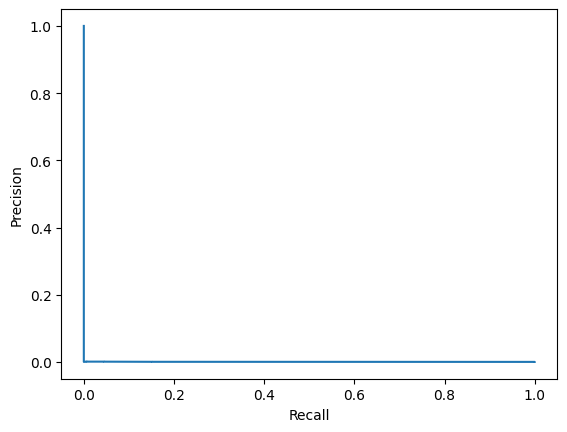

In [9]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Здесь необходимо получить значения вероятности и истинных меток для каждого класса объектов

precision, recall, thresholds = precision_recall_curve(y_true, y_score)
print(precision)
print(recall)
print(thresholds)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# ROC кривая

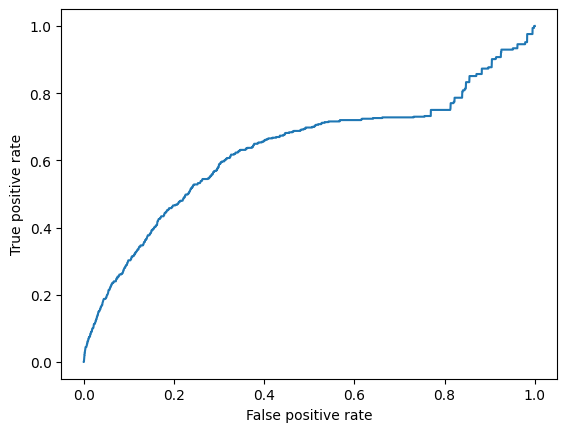

In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Здесь также необходимо получить значения вероятности и истинных меток для каждого класса объектов

fpr, tpr, _ = roc_curve(y_true, y_score)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# AUC

In [7]:
from sklearn.metrics import auc
auc_score = auc(fpr, tpr)
print("AUC: ", auc_score)

AUC:  0.6328148941518105
